In [3]:
import pandas as pd 

In [12]:
# I renamed the csv file in my local please update this to run the code
data = pd.read_csv('DataSet_Obesity.csv')

# to be removed from here once the things from Harieshwar is in place
data.drop(data.columns[0],axis='columns',inplace=True)
data['Gender'].replace({'Male':1,'Female':0},inplace=True)
print(data['NObeyesdad'].unique())
data['NObeyesdad'].replace({'Obesity_Type_I':1, 'Obesity_Type_II':1, 'Obesity_Type_III':1, 
                            'Normal_Weight':0, 'Overweight_Level_I':0, 'Overweight_Level_II':0,
                            'Insufficient_Weight':0},inplace=True)
# till here
data.head()
xin = data.drop('NObeyesdad', axis='columns')
yout = data['NObeyesdad']
print(yout.value_counts())


['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
NObeyesdad
0    1139
1     972
Name: count, dtype: int64


In [5]:
# Discuss with Guna if the below code is needed
'''
# Backward Search to find the indexes for best to worst attributes.
from sklearn.linear_model import LogisticRegression

removed_index = []
for j in range(xin.shape[1]):
    accuracy = []
    for i in range(xin.shape[1]):
        if i in removed_index:
            accuracy.append(0)
            continue
          
        x = xin.drop(xin.columns[i],axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, yout, test_size = 0.2, random_state=42)
        log_reg = LogisticRegression()
        log_reg.fit(x_train, y_train)
        y_pred = log_reg.predict(x_test)
        accuracy.append(log_reg.score(x_test, y_test))
        print('Accuracy by dropping col {}' .format(accuracy[i]))
        
    # remove the feature in such a way that accuracy is not significantly affected.
    max_index = np.argmax(accuracy)
    print()
    removed_index.append(max_index)
    print(removed_index)
    
significant_features = removed_index[::-1]
print(significant_features)

print(xin.head())
xin_significant_features = xin.iloc[:, significant_features]
print(xin_significant_features.head())
xin = xin_significant_features
'''

"\n# Backward Search to find the indexes for best to worst attributes.\nfrom sklearn.linear_model import LogisticRegression\n\nremoved_index = []\nfor j in range(xin.shape[1]):\n    accuracy = []\n    for i in range(xin.shape[1]):\n        if i in removed_index:\n            accuracy.append(0)\n            continue\n          \n        x = xin.drop(xin.columns[i],axis=1)\n        x_train, x_test, y_train, y_test = train_test_split(x, yout, test_size = 0.2, random_state=42)\n        log_reg = LogisticRegression()\n        log_reg.fit(x_train, y_train)\n        y_pred = log_reg.predict(x_test)\n        accuracy.append(log_reg.score(x_test, y_test))\n        print('Accuracy by dropping col {}' .format(accuracy[i]))\n        \n    # remove the feature in such a way that accuracy is not significantly affected.\n    max_index = np.argmax(accuracy)\n    print()\n    removed_index.append(max_index)\n    print(removed_index)\n    \nsignificant_features = removed_index[::-1]\nprint(significant_f

In [6]:

# 80-20 split 
from sklearn.model_selection import train_test_split
xin_train, xin_test, yout_train, yout_test = train_test_split(xin, yout, test_size=0.2, random_state=42)

print(xin_train.shape)

(1688, 13)


In [7]:
# function for forward feature selection using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def forward_feature_selection_using_knn(x_train, x_test, y_train, y_test):
    # store the selected features
    selected_features = []  
    max_accuracy = 0.0
    
    while len(selected_features) < x_train.shape[1]:
        best_feature = None
        for feature in x_train.columns:
            if feature not in selected_features:
                selected_features.append(feature)
                knn = KNeighborsClassifier(n_neighbors=5)
                # Train the KNN using only the selected features
                knn.fit(x_train[selected_features], y_train)
                # Predict on the test set
                y_pred = knn.predict(x_test[selected_features])
                # Calculate accuracy
                accuracy = accuracy_score(y_test, y_pred)
                # Check if adding this feature improves the accuracy
                print(f"Selected Feature: {selected_features}")
                print(f"Accuracy: {accuracy}")
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    best_feature = feature
                selected_features.remove(feature)
        if best_feature is not None:
            selected_features.append(best_feature)
        else:
            break;
    return selected_features

# Select the combination where we can achieve a higher accuracy with comparitively low num of features.
selected_features = forward_feature_selection_using_knn(xin_train, xin_test, yout_train, yout_test)
print("Final selected features:", selected_features)

Selected Feature: ['Gender']
Accuracy: 0.5177304964539007
Selected Feature: ['Age']
Accuracy: 0.7210401891252955
Selected Feature: ['Height']
Accuracy: 0.6288416075650118
Selected Feature: ['Weight']
Accuracy: 0.9290780141843972
Selected Feature: ['family_history_with_overweight']
Accuracy: 0.6501182033096927
Selected Feature: ['FAVC']
Accuracy: 0.5886524822695035
Selected Feature: ['FCVC']
Accuracy: 0.5815602836879432
Selected Feature: ['NCP']
Accuracy: 0.6052009456264775
Selected Feature: ['SMOKE']
Accuracy: 0.47044917257683216
Selected Feature: ['CH2O']
Accuracy: 0.6548463356973995
Selected Feature: ['SCC']
Accuracy: 0.5177304964539007
Selected Feature: ['FAF']
Accuracy: 0.5295508274231678
Selected Feature: ['TUE']
Accuracy: 0.5862884160756501
Selected Feature: ['Weight', 'Gender']
Accuracy: 0.966903073286052
Selected Feature: ['Weight', 'Age']
Accuracy: 0.9621749408983451
Selected Feature: ['Weight', 'Height']
Accuracy: 0.9692671394799054
Selected Feature: ['Weight', 'family_histor

   Weight  Height  Gender
0    64.0    1.62       0
1    56.0    1.52       0
2    77.0    1.80       1
3    87.0    1.80       1
4    89.8    1.78       1
Training Time:  0.0019965171813964844
Testing Time:  0.013029336929321289
Accuracy of KNN on test set:  0.9810874704491725


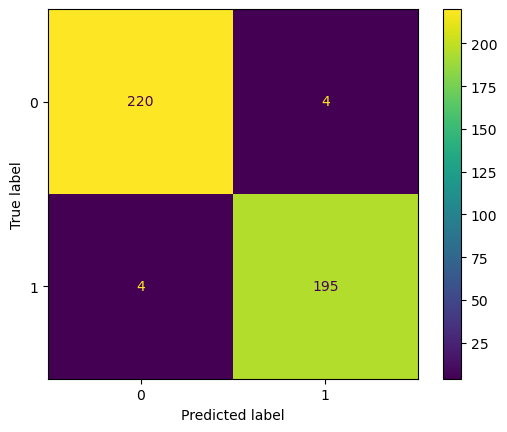

In [8]:
# training, prediction and record training time, accuracy and confusion matrix
import time 
from sklearn.metrics import ConfusionMatrixDisplay

xin_selected_features = xin[selected_features]
print(xin_selected_features.head())
x_train, x_test, y_train, y_test = train_test_split(xin_selected_features, yout,test_size = 0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
start = time.time()
knn.fit(x_train, y_train)
stop = time.time()
print("Training Time: ", stop - start)

start = time.time()
y_pred = knn.predict(x_test)
stop = time.time()
print("Testing Time: ", stop - start)

print('Accuracy of KNN on test set: ', accuracy_score(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [9]:
# forward feature selection using decision tree classifier

from sklearn.tree import DecisionTreeClassifier

def forward_feature_selection_using_dtc(x_train, x_test, y_train, y_test):
    # store the selected features
    selected_features = []  
    max_accuracy = 0.0
    
    while len(selected_features) < x_train.shape[1]:
        best_feature = None
        for feature in x_train.columns:
            if feature not in selected_features:
                selected_features.append(feature)
                dtc = DecisionTreeClassifier()
                # Train 
                dtc.fit(x_train[selected_features], y_train)
                # Predict on the test set
                y_pred = dtc.predict(x_test[selected_features])
                # Calculate accuracy
                accuracy = accuracy_score(y_test, y_pred)
                # Check if adding this feature improves the accuracy
                print(f"Selected Feature: {selected_features}")
                print(f"Accuracy: {accuracy}")
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    best_feature = feature
                selected_features.remove(feature)
        if best_feature is not None:
            selected_features.append(best_feature)
        else:
            break;
    return selected_features

# Select the combination where we can achieve a higher accuracy with comparitively low num of features.
selected_features = forward_feature_selection_using_knn(xin_train, xin_test, yout_train, yout_test)
print("Final selected features:", selected_features)

Selected Feature: ['Gender']
Accuracy: 0.5177304964539007
Selected Feature: ['Age']
Accuracy: 0.7210401891252955
Selected Feature: ['Height']
Accuracy: 0.6288416075650118
Selected Feature: ['Weight']
Accuracy: 0.9290780141843972
Selected Feature: ['family_history_with_overweight']
Accuracy: 0.6501182033096927
Selected Feature: ['FAVC']
Accuracy: 0.5886524822695035
Selected Feature: ['FCVC']
Accuracy: 0.5815602836879432
Selected Feature: ['NCP']
Accuracy: 0.6052009456264775
Selected Feature: ['SMOKE']
Accuracy: 0.47044917257683216
Selected Feature: ['CH2O']
Accuracy: 0.6548463356973995
Selected Feature: ['SCC']
Accuracy: 0.5177304964539007
Selected Feature: ['FAF']
Accuracy: 0.5295508274231678
Selected Feature: ['TUE']
Accuracy: 0.5862884160756501
Selected Feature: ['Weight', 'Gender']
Accuracy: 0.966903073286052
Selected Feature: ['Weight', 'Age']
Accuracy: 0.9621749408983451
Selected Feature: ['Weight', 'Height']
Accuracy: 0.9692671394799054
Selected Feature: ['Weight', 'family_histor

   Weight  Height  Gender
0    64.0    1.62       0
1    56.0    1.52       0
2    77.0    1.80       1
3    87.0    1.80       1
4    89.8    1.78       1
Training Time:  0.012504100799560547
Testing Time:  0.002599477767944336
Accuracy of Decision Tree Classifier on test set:  0.9929078014184397


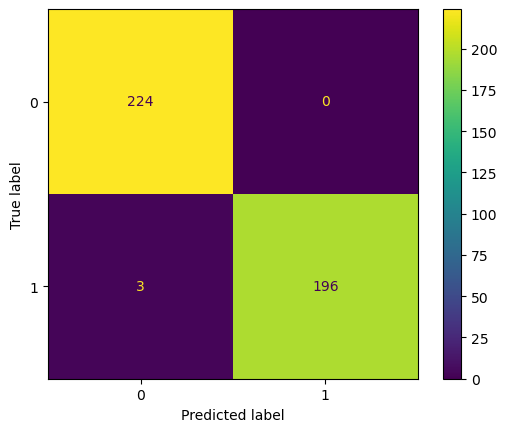

In [10]:
# training, prediction and record training time, accuracy and confusion matrix
import time 
from sklearn.metrics import ConfusionMatrixDisplay

xin_selected_features = xin[selected_features]
print(xin_selected_features.head())
x_train, x_test, y_train, y_test = train_test_split(xin_selected_features, yout,test_size = 0.2, random_state=42)

start = time.time()
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
stop = time.time()
print("Training Time: ", stop - start)

start = time.time()
y_pred = dtc.predict(x_test)
stop = time.time()
print("Testing Time: ", stop - start)

print('Accuracy of Decision Tree Classifier on test set: ', accuracy_score(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)